# Titanic 캐글

https://www.kaggle.com/competitions/titanic/data  

**META DATA**
<pre>


Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
</pre>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

# **Data Load**
<pre>

* shape
* head()
* info()
</pre>

In [3]:
tr = pd.read_csv("./train.csv")
tr.columns = tr.columns.str.lower() #소문자 변형

***

# 데이터 프레임 구조 확인하기
 **1. nan이 있어서는 안된다 : 결측은 버리거나, 채우거나**  
 **2. object가 있어서는 안된다 : 컴퓨터는 글자는 학습을 못하기 때문에, 숫자형태로 변경해줘야 학습이 가능하다.**

***

**<<<데이터 프레임 구조를 확인할 때 생각해볼 점들>>>**

<pre>

<b>[결측을 채울 방법을 고안해야 한다.]</b>

* 나이가 결측이 있다. 나이 채울 수 있는 방법은?
 - 단순히 최빈값에 넣는 것이 아닌, 다른 정보들과 결합해 유추하여 채운다. 


<b>[의미있는 값을 판별해야한다]</b>

* 고유한 값인 passengerid는 생존률에 영향이 있을까?
 = 데이터 분석에 영향을 주는 값을 판별해야 한다.
* 인밸런싱값을 잘 가려내야한다. 95:5, 99:1 이런 값들.. 컴퓨터는 압도적인 정보만 학습한다.


<b>[데이터를 단일적으로 보지 말고, 다른 컬럼과 연관해 분석해야 한다.]</b>

* fare는 단일값인지? => 총 가격에 n명을 해서 따져보기
* 동행한 가족의 여부는 어떤 영향이 있는지?
* Mr, Mrs, Dr 등은 나이, 직업, 가족관계, 성별 등을 예측할 수 있는 정보가 담겨있다.  


<b>[주요 Feature를 판별해야 한다.]</b> 

* sex :중요한 영향이 있다.  
* age : 여자, 어린이, 노인은 살아남았을 확률이 높다.  


<b>[그 외 도메인 지식들]</b>

* Cabin 이 있으면 생존한걸까?(부자일 확률이 높아서)  
* Pclass에 따라 생존율이 다를까?  

 = 해당 사건에 대한 사전지식을 통한 분석  
 = 패턴을 찾는다. 인사이트 능력이 좋다.  


</pre>

***

***

# ★무조건 결측 확인부터★  

In [4]:
#info상 수치로 총 행(줄)값은 891행인 것을 파악할 수 있다. 
# 891이 아닌 값들은 nan 값이 있음을 알 수 있다.


tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
tr.shape

(891, 12)

In [6]:
#결측 확인하기
# tr.isna().sum()


#결측만 확인하기
#결측이 0보다 큰(=결측이 있는)조건만의 합계로 걸어준다.

tr.isna().sum()[tr.isna().sum()>0]

age         177
cabin       687
embarked      2
dtype: int64

<!-- - 출력결과 다음과 같이 출력
-----------------------------
|col   | cnt   | nan_cnt |   nan_rate |
-----------------------------
|age   | 891|    177 |   23%|
----------------------------- -->

* 연습
* 출력결과 다음과 같이 출력
<pre>
col    cnt     nan_cnt     nan_rate
age    891     177         23%

컬럼명 / count / NAN값 / NAN비율


In [7]:
# age

a = tr.columns[5]
a

'age'

In [8]:
tr['age'] =tr ['age'].fillna(0)
# tr.head(20)

In [9]:
tr['age'].astype('int')

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888     0
889    26
890    32
Name: age, Length: 891, dtype: int32

In [10]:
#0을 포함한 토탈값

tot = tr['age'][tr['age']>=0].count()
tot

891

In [11]:
#넌 값

ntot = tr['age'][tr['age']==0].count()
ntot

177

In [12]:
# 비율
rate = round(((ntot/tot)*100),2).astype('str') +" %"

In [13]:
dic = [{"col":a,"cnt":tot,"non_cnt":ntot,"rates":rate}]
            #딕셔너리를 리스트화한 것

nandf = pd.DataFrame(dic)

nandf

,col,cnt,non_cnt,rates
0,age,891,177,19.87 %


In [14]:
a = tr.columns[5]
# tr['age'] =tr ['age'].fillna(0)
# tr['age'].astype('int')

# tot = tr['age'][tr['age']>=0].count()
# ntot = tr['age'][tr['age']==0].count()
# rate = round(((ntot/tot)*100),2).astype('str') +" %"

# dic = [{"col":a,"cnt":tot,"non_cnt":ntot,"rates":rate}]
#             #딕셔너리를 리스트화
# nandf = pd.DataFrame(dic)

# nandf

In [15]:
# 교수님 답안

# col       = tr.columns   
# cnt       = tr.notna().sum()   
# nan_cnt   = tr.isna().sum()       
# nan_rate  = round(  (nan_cnt / tr.shape[0]) * 100,  2 )

# dic   = {"cnt":cnt, "nan_cnt":nan_cnt, "nan_rate":nan_rate}
# nandf = pd.DataFrame(dic)
# nandf.sort_values(by="nan_cnt", ascending=False).T

# 중복값 확인
    - 고유값 확인
    * df[컬럼].unique() = distinct
    * df[컬럼].nunique()

In [16]:
# select distinct sex from titaic;
# 유니크값은 일치되는 값이 너무 적어도, 너무 많아도(연관성이 적어서), 분석에 별로 도움이 안된다. 

tr['sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
len(tr['sex'].unique())

2

In [18]:
tr['sex'].nunique()

2

문제 : 컬럼별 유니크 갯수 찍어보기

In [19]:
t_list = tr.columns.values

In [20]:
tr.nunique()

passengerid    891
survived         2
pclass           3
name           891
sex              2
age             89
sibsp            7
parch            7
ticket         681
fare           248
cabin          147
embarked         3
dtype: int64

***

# EDA
    * EDA : (Exploratory Data Analysis, 탐색적 데이터 분석)
    * 통계적 분석 & 차트(시각화)

In [21]:
# !는 터미널(파이썬)에서의 "="과 똑같다
##### ! pip install matplotlib   

# 설치했으면 재설치 방지 위해 막아준다.

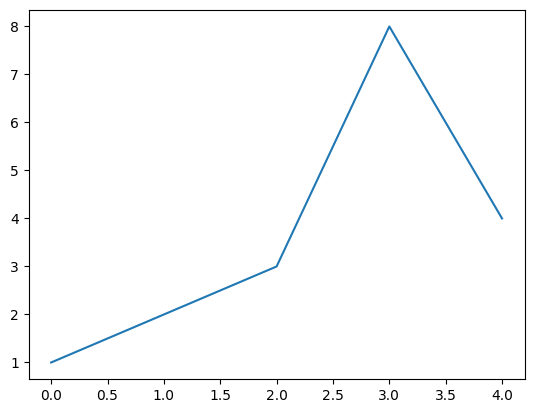

In [22]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,8,4])
plt.show()

## Survived(정답 타겟) 연습 0: die , 1 : save

In [23]:
tr = pd.read_csv("./train.csv")

In [24]:
tr.columns = tr.columns.str.lower() #소문자 변형

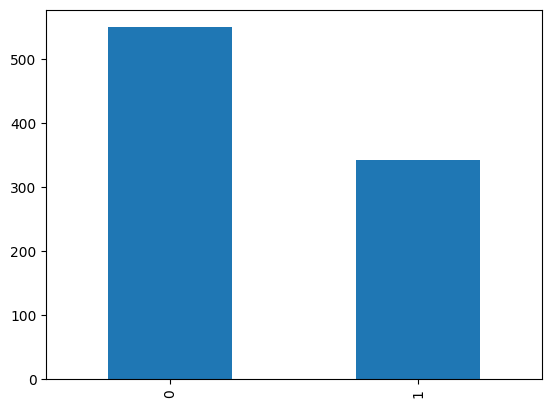

In [25]:
tr.groupby('survived')['survived'].count()
tr['survived'].value_counts().plot(kind='bar')
plt.show()

In [26]:
tr['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

## Pclass : 주요 Feature

3    491
1    216
2    184
Name: pclass, dtype: int64


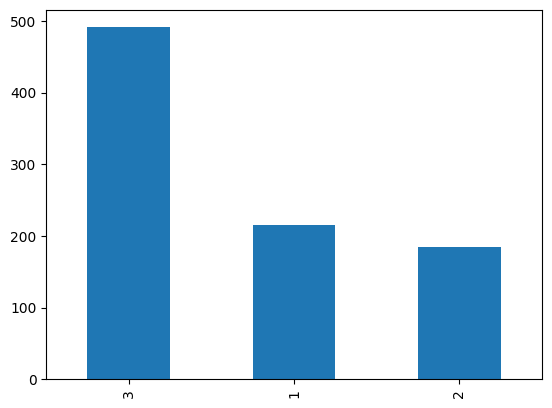

In [27]:
# tr.groupby('pclass').count()
#pclass 단독 그래프


print(  tr['pclass'].value_counts()  )
tr['pclass'].value_counts().plot(kind='bar')
plt.show()

In [28]:
#pclass와 Survived의 연관성을 결과값으로 인덱스 기준 비교하기

tr[['pclass','survived']].value_counts().sort_index() 

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

<AxesSubplot: xlabel='pclass,survived'>

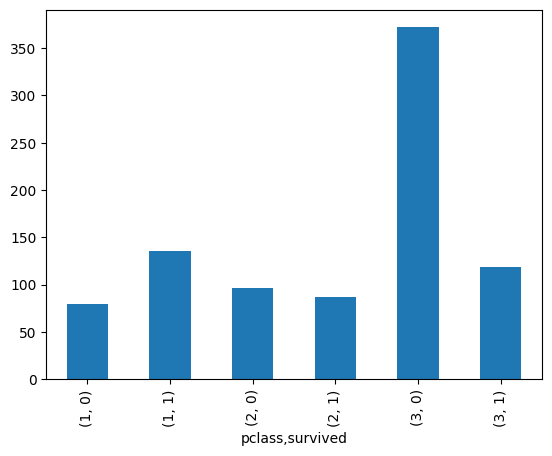

In [29]:
#위의 비교값을 차트화해서 보기

tr[['pclass','survived']].value_counts().sort_index().plot(kind='bar')

 * 결론 : pclass가 3등급일 수록 더 많은 사망을 했음을 알 수 있다.  
           = 유의미한 데이터. keep

## Cabin : 애매해서 drop 예정

In [30]:
tr.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [31]:
#Cabin은 Nan값이 있기 때문에, notna값만 조회한다.
#Cabin의 Nan값은 단순히 소유유무이기 때문에, nan값을 0으로 처리한다.

tr[tr['cabin'].notna()]['cabin'].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: cabin, dtype: object

In [32]:
tr['cabin'][tr['cabin'].notna()].str[0:1]

# 캐빈이 낫 넌인 글자 타입으로 변형한 후, 0:1 자리를 슬라이스한 뒤의 값들

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: cabin, Length: 204, dtype: object

In [33]:
#Cabin값의 앞글자만 추출하기 : 스트링 -> 슬라이싱

tr['cabin2'] = tr['cabin'].str[0:1]
tr[['cabin','cabin2']].head(3)

,cabin,cabin2
0,NaN,NaN
1,C85,C
2,NaN,NaN


* 탐구점 : 캐비넷 구역이랑 pclass랑 연관이 있는지 확인.  

    - pclass 등급따라 생존했나?

In [34]:
tr[['cabin2','pclass']].value_counts().sort_index() 

# cabin2와 Pclass를 비교해본다.
# Pclass 1등급을 많이 쓴 A B C 캐빈, 비싼애들이 캐빈값을 많이 가진 것은 맞는 것 같다.
# 그치만 이것만 보고 Pclass 높다고 많이 산 것 같다고 할 수는 없다...아직은 모름

cabin2  pclass
A       1         15
B       1         47
C       1         59
D       1         29
        2          4
E       1         25
        2          4
        3          3
F       2          8
        3          5
G       3          4
T       1          1
dtype: int64

In [35]:
tr[['cabin2','survived']].value_counts().sort_index() 

# 서바이브의 값과 캐빈2(구역번호)의 값을 비교해본다. 

cabin2  survived
A       0            8
        1            7
B       0           12
        1           35
C       0           24
        1           35
D       0            8
        1           25
E       0            8
        1           24
F       0            5
        1            8
G       0            2
        1            2
T       0            1
dtype: int64

 * p클라스의 종속이 캐빈이기 때문에(pclass가 높은 사람들은 캐빈을 많이 가지고 있다.),  
   캐빈을 굳이 분석하지 않고, p클라스와의 연관만 따져보기로 한다.

***

## Embarked : 최빈값 mode()으로 결측 채우기
    탐구점 : 경유지별로 사람이 살았나 죽었나 관계가 있는가?

In [36]:
tr.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C


In [37]:
#embarked의 값 조회

tr['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [38]:
#embarked는 결측이 있다.
#어떻게 결측을 채울것인가?

tr['embarked'].isna().sum()

2

In [39]:
#embarked와 survived 연관성 조회

tr[['embarked','survived']].value_counts().sort_index()

embarked  survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

<AxesSubplot: xlabel='embarked,survived'>

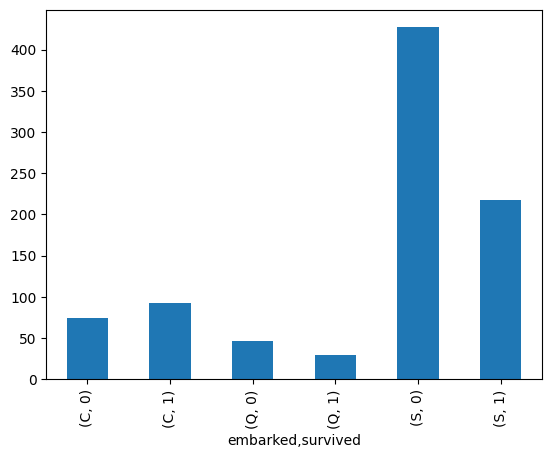

In [40]:
tr[['embarked','survived']].value_counts().sort_index().plot(kind = 'bar')

* S가 압도적으로 많이 죽고 살아보이지만, 그냥 S정박지에서 많은 사람이 탑승해서일 수 있다.

Q. **결측값을 어떻게 채울 것인가?**  
  
    -최빈값(가장 많은 값)에 넣는다.   
    가장 많은 데이터 안에 속해서 큰 의미를 갖지 않게(반면, 작은 값으로 가면 의미가 커진다.) 

In [41]:
# describe() 코드는 수치형이 아닌 글자형(오브젝트)일 때는 count, top(최빈도값), 유니크 갯수, freq값(최빈값)을 알 수 있다.

tr[['embarked','sex']].describe()

,embarked,sex
count,889,891
unique,3,2
top,S,male
freq,644,577


In [42]:
tr['embarked'] = tr['embarked'].fillna(tr['embarked'].mode().values[0])

# tr['embarked'].mode().values[0] = 최빈값 코드
# 그냥 모드까지만 하면 array를 뽑기 때문에, value[0]으로 지정
#하드 코딩하지 말고, 최빈값 구하는 mode().values로 넣어준다.
# 길어지니까 변수 지정해서 해준다.

In [43]:
#결측이 처리됐음을 확인한다.

tr['embarked'].isna().sum()

0

## **'sex': 주요 Feature**

In [44]:
#결측 확인

tr['sex'].isna().sum()

0

In [45]:
tr['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [46]:
tr[['sex','survived']].value_counts().sort_index()

#survived와의 비교
#남자는 많이 죽었다. 즉, 의미있는 데이터이다.

sex     survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

## **Name**

### 이름을 이용하여 나이 결측 채우기
     - 이름 호칭을 잘라다가 미스, 미스터, 닥터, 주니어 등의 평균 나이 유추


In [47]:
tr['name'].isna().sum()

0

***

### 정규표현식

* 이름에서 특정 값을 추출하기 위한 작업

* <b>정규표현식</b>
* match() : 첫글자부터 아니면 땡
* search() /  findall() : 전체적으로 찾아준다.

    
    * p = re.compile(패턴) => 먼저 정의 해준 뒤 변수로 사용한다.  
    
    <b>* p.findall(타겟문장)  
        * p.search(타겟문장)  </b>

In [48]:
import re

In [49]:
p = re.compile("\w*[.][t]\w*")
m = p.search('a100.txt')
s = p.search('abc.txt')
x = p.search('aa.jpg')
print(m)
print(s)
print(x)

re.findall

<re.Match object; span=(0, 8), match='a100.txt'>
<re.Match object; span=(0, 7), match='abc.txt'>
None


<function re.findall(pattern, string, flags=0)>

In [50]:
# James 홍길동 아무개 -> 한글 이름만

xxp = re.compile("[가-힣]+")
m = xxp.findall("홍길동 아무개")
print(m)

['홍길동', '아무개']


In [51]:
# "asdfasdf, Miss. Ham"

p = re.compile("\s*\w*[.]\s")
m = p.findall("asdfasdf, Miss. Ham")[0].strip() #위 정규표현식이 찾는 값 : Miss. ->단일이니까 [0]을 strip 한다.
print(m)

Miss.


In [52]:
#예림

p=re.compile('\s*\w+\s*')
m = p.findall("Nasser, Mrs. Nicholas (Adele Achem)")[1]


In [53]:
#영기

op = re.compile('[A-Za-z]*[.]')
m = op.search("Nasser, Mrs. Nicholas (Adele Achem)")
print(m)

<re.Match object; span=(8, 12), match='Mrs.'>


In [54]:
#영기

op = re.compile('\w*[.]')
m = op.search("Nasser, Mrs. Nicholas (Adele Achem)")
print(m)
print("search()한 결과를 string으로 받기 :" , m.group())

<re.Match object; span=(8, 12), match='Mrs.'>
search()한 결과를 string으로 받기 : Mrs.


In [55]:
p = re.compile('\s[\w]+[.]\s')
m = p.findall("Nasser, Mrs. Nicholas (Adele Achem)")[0].strip()
print(m)

Mrs.


In [56]:
# train['name'].str.extract('정규표현식패턴')
#그냥 끄집어내면 시리즈를 넣는 것이기 때문에, str(글자처리)를 먼저 해줘야한다.


tr['name'].str.extract('(\s[\w]+[.]\s)') #반드시 그룹화 해줘라 : ()

,0
0,Mr.
1,Mrs.
2,Miss.
3,Mrs.
4,Mr.
...,...
886,Rev.
887,Miss.
888,Miss.
889,Mr.


In [57]:
tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [58]:
tr['name_title'] = tr['name'].str.extract('(\s[\w]+[.]\s)')
tr['name_title'] = tr['name_title'].str.strip()
tr[['name_title']].tail()

,name_title
886,Rev.
887,Miss.
888,Miss.
889,Mr.
890,Mr.


In [59]:
#name_title을 그룹화해서 카운트 = values_counts()

# trc.groupby('name_title')['name_title'].count().sort_values(ascending = False)

In [60]:
# 위랑 같은 거 훨씬 쉽게

tr['name_title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: name_title, dtype: int64

In [61]:
tr.groupby('name_title')['age'].count()

name_title
Capt.          1
Col.           2
Countess.      1
Don.           1
Dr.            6
Jonkheer.      1
Lady.          1
Major.         2
Master.       36
Miss.        146
Mlle.          2
Mme.           1
Mr.          398
Mrs.         108
Ms.            1
Rev.           6
Sir.           1
Name: age, dtype: int64

***

<pre>
마드모아젤 : 어린 여자아이 = miss
ms 결혼여부: miss
Lady : miss

#-------------------------#

Mme : 마담 Mrs
countness 백작부인 : mrs

#--------------------------#

sir 백작, 선생님 : mr
capt 해군, 선생님, 공군 : mr
Rev : 목사 -> Mr
Major : 미군 Mr
col : 육군 대령 Mr
don 중남미 남성 호칭 : Mr
jonkheer 무작위 귀족 : Mr

Master , dr : 선생님, 의사는 유추 애매..
</pre>

## 피쳐 값 변경 Replace(),Map,apply

1) df.replace('A','B', inplace=True)
2) df.map({'A':'B'}) #해당 값을 바꿔라.
3) df.apply(lambda)

* 연습

### replace()
    - replace(기존값,바꿀값)
    - replace([1,2,3],[11,22,33]) 식의 복수값도 가능

In [62]:
trc = tr.copy()
trc.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr.


In [63]:
trc['pclass'].replace(3,33,inplace=True) #pclass의 3 값을 33으로 바꿔라.
trc.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
0,1,0,33,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,33,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,33,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr.


In [64]:
trc['pclass'].replace([1,2,3],[11,22,33],inplace=True) # 1,2,3을 11,22,33으로 바꿔라
trc.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
0,1,0,33,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.
1,2,1,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,33,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.
3,4,1,11,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,33,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr.


### map()
    - 딕셔너리 정의 후 집어넣기

In [65]:
dic = {'male':1, 'female':0} #원본값을 새 값으로 바꿔주는 딕셔너리

trc['sex'] = trc['sex'].map(dic)

trc.tail(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
888,889,0,33,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN,Miss.
889,890,1,11,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C,C,Mr.
890,891,0,33,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q,NaN,Mr.


### apply(Lambda)
    -람다를 이용해 한 줄 함수 사용하기

In [66]:
trc['sex'] = trc['sex'].apply(lambda x : 'male' if x == 1 else 'female')

In [67]:
# if x ==1 :
#     male
# else :
#     female 를 람다식으로 올려준다.

In [68]:
trc['sex'].tail(3)

888    female
889      male
890      male
Name: sex, dtype: object

In [69]:
# iloc, loc 변경
# df.iloc[줄,칸]

<pre>
마드모아젤 : 어린 여자아이 = miss
ms 결혼여부: miss
Lady : miss

#-------------------------#

Mme : 마담 Mrs
countness 백작부인 : mrs

#--------------------------#

sir 백작, 선생님 : mr
capt 해군, 선생님, 공군 : mr
Rev : 목사 -> Mr
Major : 미군 Mr
col : 육군 대령 Mr
don 중남미 남성 호칭 : Mr
jonkheer 무작위 귀족 : Mr

Master , dr : 선생님, 의사는 유추 애매..
</pre>

 * mr로 변경하기

In [70]:
# trc['name_title'].replace(['Sir.','Capt.','Rev.','Major.','Col.','Don.','Jonkheer.'],['Mr','Mr.','Mr.','Mr.','Mr.','Mr.','Mr.'],inplace=True)

# trc.tail(10)

In [71]:
# dic2 = {'Mlle.':'Miss.', 'Countness.':'Miss.','Ms.':'Miss.'}

# trc['name_title'] = trc['name_title'].map(dic2)

# trc.head()

In [72]:
trc['name_title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: name_title, dtype: int64

In [73]:
dic = {  'Mr.':'Mr.',
         'Rev.':'Mr.',
         'Don.':'Mr.',
         'Jonkheer.':'Mr.',
         'Major.':'Mr.',
         'Col.':'Mr.',
         'Capt.':'Mr.',
         'Sir.':'Mr.',
        'Countess.':'Mrs.',
       'Mme.':'Mrs.',
       'Mlle.':'Miss.', 
       'Ms.':'Miss.', 
       'Lady.':'Miss.',
       'Dr.' :'Dr.',
       'Master.':'Master.',
       'Miss.':'Miss.',
       'Mrs.':'Mrs.',
       'Mr.':'Mr.'
        }
tr['name_title'] = tr['name_title'].map(dic)
# tr[['name_title','name_title2']][ tr['name_title']=='Major.'].head()

In [74]:
trc['name_title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: name_title, dtype: int64

In [75]:
# trc['name_title2']  = trc['name_title'].replace(['Countess.','Mme.'],['Mrs.', 'Mrs.'])
# trc[['name_title','name_title2']][ trc['name_title']=='Mme.'].head()

In [76]:
# trc['name_title2']  = trc['name_title'].apply(lambda x : 'Miss.' if x in ('Mlle.', 'Ms.', 'Lady.') else x )
# trc[['name_title','name_title2']][ trc['name_title']=='Ms.'].head()

In [77]:
tr['name_title'].isna().sum()

0

In [78]:
tr['name_title'].value_counts()

Mr.        531
Miss.      186
Mrs.       127
Master.     40
Dr.          7
Name: name_title, dtype: int64

In [79]:
#필요없는 자료값 지우기(정제되기 전의 name)

tr.drop('name',axis = 1)

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,NaN,Mr.
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,B,Miss.
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Miss.
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,C,Mr.


### apply vs transform

<table style="border-collapse: collapse; width: 100%;" border="1">
<tbody>
<tr>
<td style="width: 33.3333%;">&nbsp;</td>
<td style="width: 33.3333%; text-align: center;"><b>apply</b></td>
<td style="width: 33.3333%; text-align: center;"><b>transform</b></td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><br><b>[공통]</b><br><br></td>
<td style="width: 66.6666%; text-align: center;" colspan="2">컬럼명을 메서드 밖에서 명시하면 결과는 같게 나온다.</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><b>[차이1]</b><br><br><b>컬럼명을 메서드 안에서 명시하면</b></td>
<td style="width: 33.3333%; text-align: center;">그룹별 시리즈 리턴</td>
<td style="width: 33.3333%; text-align: center;">에러</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><b><span style="color: #333333;">[차이2]<br></span></b><br><b><span style="color: #333333;">컬럼명을 메서드 안과 밖에 <br>모두 명시하지 않는다면</span></b></td>
<td style="width: 33.3333%; text-align: center;">기존 데이터의 자료형과 함수가<br><br><u>연산 가능해야만 실행</u>된다.</td>
<td style="width: 33.3333%; text-align: center;"><u>연산 가능한 컬럼만 알아서</u><br><br><u>필터링</u>되어 결과가 나온다.</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><b><span style="color: #333333;"><span style="color: #333333;">[★차이3★]<br></span><br><span style="color: #333333;">연산 가능한 컬럼만 함수 적용한다면</span></span></b></td>
    <td style="width: 33.3333%; text-align: center;"><u><b>그룹별 데이터프레임</b></u> 출력<br><br>(멀티인덱스)</td>
<td style="width: 33.3333%; text-align: center;"><u><b>기존 인덱스</u> 유지</b></td>
</tr>
</tbody>
</table>

#### 컬럼명을 매서드 밖에서 명시

* 연습하기

In [80]:
emp = pd.read_csv("../lec08_emp.csv")
emp.columns = emp.columns.str.lower()
emp.head(2)

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17 00:00:00,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20 00:00:00,1600,300.0,30


In [81]:
# 부서별 그룹화 후 급여의 평균값 조회

emp.groupby('deptno')['sal'].mean()

deptno
10    2916.666667
20    2175.000000
30    1566.666667
Name: sal, dtype: float64

In [82]:
# 부서번호 10번의 급여 조회

emp['sal'][emp['deptno']==10]

6     2450
8     5000
13    1300
Name: sal, dtype: int64

In [83]:
#부서별 그룹화해서 평균을 보여줘라
# 원본 데이터 모양을 자동으로 변형해 필요한 정보만 보여준다.
# apply는 연산이 안되는 컬럼이 있으면 에러를 낸다.


emp.groupby('deptno').apply(np.mean)

,empno,mgr,sal,comm,deptno
deptno,,,,,
10,7851.666667,7810.5,2916.666667,NaN,10.0
20,7700.200000,7732.2,2175.000000,NaN,20.0
30,7686.000000,7721.5,1566.666667,550.0,30.0


In [84]:
#부서 그룹화의 sal컬럼만 보고싶을 때

emp.groupby('deptno')['sal'].apply(np.mean)

deptno
10    2916.666667
20    2175.000000
30    1566.666667
Name: sal, dtype: float64

In [85]:
# 부서별로 각 컬럼의 평균값으로 채워져있다.
# 10번 부서의 모든 값이 평균으로 채워져있다.
# 원본 컬럼의 모양도 그대로 유지하고 있다.

emp.groupby('deptno').transform(np.mean)# = ("mean")

,empno,mgr,sal,comm
0,7700.200000,7732.2,2175.000000,NaN
1,7686.000000,7721.5,1566.666667,550.0
2,7686.000000,7721.5,1566.666667,550.0
3,7700.200000,7732.2,2175.000000,NaN
4,7686.000000,7721.5,1566.666667,550.0
5,7686.000000,7721.5,1566.666667,550.0
6,7851.666667,7810.5,2916.666667,NaN
7,7700.200000,7732.2,2175.000000,NaN
8,7851.666667,7810.5,2916.666667,NaN
9,7686.000000,7721.5,1566.666667,550.0


***

## transform과 apply를 활용하여 나이 결측 채우기

In [86]:
trcopy = tr.copy()

* 연습하기

### apply

In [87]:
# 일괄적용하는 문법
def age_minus(x):
        return x - 1

trcopy.groupby('name_title', group_keys = True)['age'].apply(age_minus).head() #일괄적으로 함수를 적용시킬 때 / 연산 안되는 애 있으면 에러 남
 #알아서 되는애들만 필터링해줌
# trcopy.groupby('name_title', group_keys = True)['age'].first()

name_title     
Dr.         245    43.0
            317    53.0
            398    22.0
            632    31.0
            660    49.0
Name: age, dtype: float64

In [88]:
def age_minus(x):
        return x - 1
    
trcopy.groupby('name_title', group_keys = True)['age'].transform(age_minus).head()

0    21.0
1    37.0
2    25.0
3    34.0
4    34.0
Name: age, dtype: float64

**[컬럼명을 메서드 밖에서 명시하면 apply나 transform 이나 결과는 똑같다.]**

### 안에 명시하면 transform만 구동된다.

In [89]:
trcopy.groupby('name_title').first()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2
name_title,,,,,,,,,,,,,
Dr.,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,C
Master.,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,F4,S,F
Miss.,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,G
Mr.,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,E46,S,E
Mrs.,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C


In [90]:
def age_minus(x):
        return x - 1

    #그룹화 시킨 후, 나이만 그룹화한 함수에 적용
trcopy.groupby('name_title', group_keys = True).apply(lambda gdf : age_minus(gdf['age'])).head()

name_title     
Dr.         245    43.0
            317    53.0
            398    22.0
            632    31.0
            660    49.0
Name: age, dtype: float64

In [91]:
#트랜스폼은 에러난다.

# def age_minus(x):
#         return x - 1

# trcopy.groupby('name_title', group_keys = True).transform(lambda gdf : age_minus(gdf['age'])).head()

### 컬럼명을 메서드 안,밖 모두에 명시하지 않는(컬럼명 쓰지 않는 경우)

In [92]:
# 워닝은 뜨지만, 컬럼명 명시하지 않고 데이터 전체를 대상으로 transform 했을 때, 연산처리 되는 값들은 보여준다.
#  = 자동필터링 해준다


def age_minus(x):
        return x - 1

trcopy.groupby('name_title', group_keys = True).transform(age_minus).head()

,passengerid,survived,pclass,age,sibsp,parch,fare
0,0,-1,2,21.0,0,-1,6.2500
1,1,0,0,37.0,0,-1,70.2833
2,2,0,2,25.0,-1,-1,6.9250
3,3,0,0,34.0,0,-1,52.1000
4,4,-1,2,34.0,-1,-1,7.0500


In [93]:
# -1연산이 안되는 글자컬럼들이 있기 때문에, 에러가 난다.

# def age_minus(x):
#         return x - 1

# trcopy.groupby('name_title', group_keys = True).apply(age_minus).head()

In [94]:
def age_minus(x):
        return x - 1

trcopy.groupby('name_title', group_keys = True).transform(age_minus).head()

,passengerid,survived,pclass,age,sibsp,parch,fare
0,0,-1,2,21.0,0,-1,6.2500
1,1,0,0,37.0,0,-1,70.2833
2,2,0,2,25.0,-1,-1,6.9250
3,3,0,0,34.0,0,-1,52.1000
4,4,-1,2,34.0,-1,-1,7.0500


### 연산 가능한 컬럼만 함수 적용

In [95]:
trcopy2 = trcopy.groupby('name_title',as_index = False)[['age','fare']]
trcopy2 = trcopy2.count()

trcopy2

,name_title,age,fare
0,Dr.,6,7
1,Master.,36,40
2,Miss.,150,186
3,Mr.,412,531
4,Mrs.,110,127


In [96]:
# fill_mean_func = lambda g : g.fillna(g.mean())

#??

In [97]:
# def age_minus(x):
#         return x - 1

# trcopy.groupby('name_title', group_keys = True).apply(lambda gdf : gdf.fillna(gdf.mean()))
trcopy2.groupby('name_title', group_keys=True).apply(lambda gdf : gdf.fillna(gdf.mean()) )

,,name_title,age,fare
name_title,,,,
Dr.,0,Dr.,6,7
Master.,1,Master.,36,40
Miss.,2,Miss.,150,186
Mr.,3,Mr.,412,531
Mrs.,4,Mrs.,110,127


### 원본에 적용해보기(transform)

In [98]:
tr.groupby('name_title', group_keys=True)['age'].mean()

name_title
Dr.        42.000000
Master.     4.574167
Miss.      22.020000
Mr.        32.891990
Mrs.       35.763636
Name: age, dtype: float64

In [99]:
# trcopy.groupby('name_title', group_keys = True)['age'].transform(lambda gdfage : gdfage.fillna(gdfage.mean()))

# train['age2'] = train['age'].fillna( train.groupby('name_title2', group_keys=True)['age'].transform("mean") )     
# train[['name_title2','age','age2']] [train['age'].isna()]

              #결측인 값만    #tr을 네임타이틀로 그룹바이 해주고, 나이 컬럼을 평균으로 채워줘라.  
tr['age2'] = tr['age'].fillna(tr.groupby('name_title', group_keys=True)['age'].transform("mean"))
tr[['name_title','age','age2']] [tr['age'].isna()]

,name_title,age,age2
5,Mr.,NaN,32.891990
17,Mr.,NaN,32.891990
19,Mrs.,NaN,35.763636
26,Mr.,NaN,32.891990
28,Miss.,NaN,22.020000
...,...,...,...
859,Mr.,NaN,32.891990
863,Miss.,NaN,22.020000
868,Mr.,NaN,32.891990
878,Mr.,NaN,32.891990


In [100]:
# 그룹의 평균나이 채워보자!

In [101]:
tr.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'cabin2', 'name_title',
       'age2'],
      dtype='object')

## 호칭은 주요 Feature이다.

In [102]:
#호칭에 따른 생존율은 큰 의미가 있다.

tr[['name_title','survived']].value_counts().sort_index()

name_title  survived
Dr.         0             4
            1             3
Master.     0            17
            1            23
Miss.       0            55
            1           131
Mr.         0           447
            1            84
Mrs.        0            26
            1           101
dtype: int64

* 결측 채운 후 나이와 생존과의 관계 다시 확인

## Age 

In [103]:
tr['age'].isna().sum()

177

In [104]:
tr['age'].value_counts().sort_index()

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: age, Length: 88, dtype: int64

In [105]:
tr['age'].describe()

# 29 평균
# 29 (+- 14) 분포
# 최소 0.42
# 최대 80

#왜도 : 어느 한 쪽으로 수치값이 쏠려있는 현상.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

<AxesSubplot: >

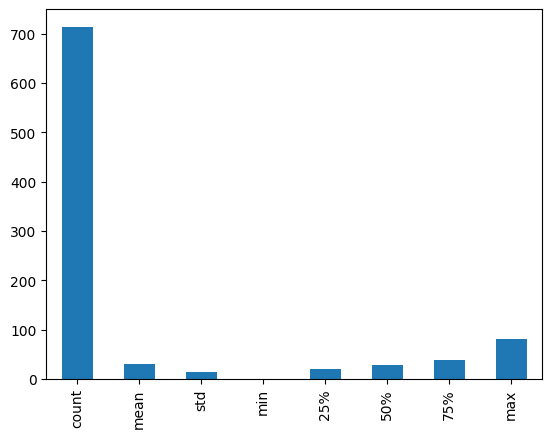

In [106]:
tr['age'].describe().plot(kind = 'bar')

## 호칭별 평균 나이 : 나이 결측을 채우자

* age2 : name_title을 이용해서 호칭별 평균나이 결측을 채운다.

In [107]:
# 성별 평균 나이

tr.groupby('name_title')['age'].mean()

name_title
Dr.        42.000000
Master.     4.574167
Miss.      22.020000
Mr.        32.891990
Mrs.       35.763636
Name: age, dtype: float64

In [108]:
# fillna() 는 단일값만 채워주는 것이라. 어떤 그룹의 값으로 일괄 변경해라~ 는 할 수 없다.

In [109]:
# 호칭별 평균 나이, fillna

# 나이가 nan인데, name_title이 mr인 사람은? : fillna로 

trcc = tr.copy()

trcc.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr.,35.0


### 나이를 구간화 시켜보자

In [110]:
#가장 간단한 방법

int(str(80)[0:1])

8

In [111]:
#나누기, 몫, 나머지

89/10, 89//10, 89%10

(8.9, 8, 9)

In [112]:
tr['age_gugan'] = tr['age2']//10
tr['age_gugan'] = tr['age_gugan'].astype('int')


In [113]:
#나이 구간별 생존 유무 : 나이 자체로만은 별 의미가 없어보인다.

tr[['age_gugan','survived']].value_counts().sort_index()

age_gugan  survived
0          0            26
           1            40
1          0            61
           1            41
2          0           157
           1            99
3          0           202
           1           101
4          0            56
           1            34
5          0            28
           1            20
6          0            13
           1             6
7          0             6
8          1             1
dtype: int64

In [114]:
tr.loc[888]

passengerid                                         889
survived                                              0
pclass                                                3
name           Johnston, Miss. Catherine Helen "Carrie"
sex                                              female
age                                                 NaN
sibsp                                                 1
parch                                                 2
ticket                                       W./C. 6607
fare                                              23.45
cabin                                               NaN
embarked                                              S
cabin2                                              NaN
name_title                                        Miss.
age2                                              22.02
age_gugan                                             2
Name: 888, dtype: object

In [115]:
tr.drop('name',axis = 1,inplace = True)

### age 구간과 생존관계 확인해보기

In [116]:
tr[['age_gugan','survived']].value_counts().sort_index()

age_gugan  survived
0          0            26
           1            40
1          0            61
           1            41
2          0           157
           1            99
3          0           202
           1           101
4          0            56
           1            34
5          0            28
           1            20
6          0            13
           1             6
7          0             6
8          1             1
dtype: int64

***

* Crosstab 함수

<pre>

def crosstab(
  <b> index, -- y축
    columns, -- x축</b>
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: bool = False,
    margins_name: str = "All",
    dropna: bool = True,
    normalize=False,
) -> DataFrame:

</pre>

In [117]:
pd.crosstab(index=[tr['pclass']], columns = [tr['age_gugan'],tr['survived']])

age_gugan   0       1        2        3       4       5      6     7  8
survived    0   1   0   1    0   1    0   1   0   1   0   1  0  1  0  1
pclass                                                                 
1           1   2   3  15   10  25   26  52  16  22  12  15  9  4  3  1
2           0  17   9   9   31  24   36  21   8  10  10   5  2  1  1  0
3          25  21  49  17  116  50  140  28  32   2   6   0  2  1  2  0

* 어린 나이일 수록 칸의 등급에 따라 생존율이 달라진다. 노인은 칸 등급에 상관없다.

In [118]:
pd.crosstab(index=[tr['pclass'],tr['sex']], columns = [tr['age_gugan'],tr['survived']])

age_gugan       0       1       2        3       4       5      6     7  8
survived        0   1   0   1   0   1    0   1   0   1   0   1  0  1  0  1
pclass sex                                                                
1      female   1   0   0  13   1  16    0  35   0  13   1  11  0  3  0  0
       male     0   2   3   2   9   9   26  17  16   9  11   4  9  1  3  1
2      female   0   8   0   8   3  24    1  16   1   9   1   5  0  0  0  0
       male     0   9   9   1  28   0   35   5   7   1   9   0  2  1  1  0
3      female  10  11  11  13  30  34   12  13   9   0   0   0  0  1  0  0
       male    15  10  38   4  86  16  128  15  23   2   6   0  2  0  2  0

* 성별을 추가하면, 더 유의미한 데이터가 된다.
* 50% 이상이 넘어가면 컴퓨터는 유의미한 데이터로 인식하지만,  
  데이터 수가 현저히 적으면 우연일 수도 있기 때문에 데이터 양이 많아야 의미 있는 데이터를 도출할 수 있다.

## Pivot Table

<pre>

pivot_table

def pivot_table(
        self,
        <b>values=None,
        index=None,
        columns=None,
        aggfunc="mean"</b>,
        fill_value=None,
        margins=False,
        dropna=True,
        margins_name="All",
        observed=False,
        sort=True,
    )
</pre>

In [119]:
# 인덱스(그룹화) : 그렇기 때문에, empno같은 값으로 하면 그룹화가 되지 않는다.
                                                  #그룹화한 값을 조회하자.
emp.pivot_table(index = 'deptno', values = 'sal', aggfunc = 'mean')
# = emp.groupby('deptno')['sal'].mean()

,sal
deptno,
10,2916.666667
20,2175.000000
30,1566.666667


## sibsp , parch 

* family는 합산

In [120]:
tr['family'] = tr['sibsp'] + tr['parch'] + 1 #+1은 본인 포함한 수치이다.
tr.sort_values('family')

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,age2,age_gugan,family
890,891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q,NaN,Mr.,32.000000,3,1
680,681,0,3,female,NaN,0,0,330935,8.1375,NaN,Q,NaN,Miss.,22.020000,2,1
681,682,1,1,male,27.0,0,0,PC 17572,76.7292,D49,C,D,Mr.,27.000000,2,1
391,392,1,3,male,21.0,0,0,350034,7.7958,NaN,S,NaN,Mr.,21.000000,2,1
682,683,0,3,male,20.0,0,0,6563,9.2250,NaN,S,NaN,Mr.,20.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,202,0,3,male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,Mr.,32.891990,3,11
159,160,0,3,male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,Master.,4.574167,0,11
792,793,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,Miss.,22.020000,2,11
180,181,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,Miss.,22.020000,2,11


* A/5 21171	7.2500 2명 티켓번호 동행자

In [121]:
tr[tr['ticket'] == "A/5 21171"]

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,age2,age_gugan,family
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,NaN,Mr.,22.0,2,2


In [122]:
tr[tr['ticket'] == "A/5 21171"]

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,age2,age_gugan,family
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,NaN,Mr.,22.0,2,2


In [123]:
tr[['family','survived']].value_counts().sort_index()

family  survived
1       0           374
        1           163
2       0            72
        1            89
3       0            43
        1            59
4       0             8
        1            21
5       0            12
        1             3
6       0            19
        1             3
7       0             8
        1             4
8       0             6
11      0             7
dtype: int64

In [124]:
pd.crosstab(index = [tr['pclass'],tr['survived']], columns = tr['family'])

#티켓팅은 11명이 했지만 탑승은 7명이 해서 7명이라고 뜨는 것.
#3등급이라 죽은건지, 11명이 타서 죽은건지는 애매하다.
# 1등급 : 혼자는 비슷비슷, 동행 2-4명은 살 확률이 높아졌다. 
# 3등급 : 혼자는 죽을 확률이 월등히 높고, 동행이 적을 수록 살 확률이 생긴다.
# 결론 : 혼자 혹은 너무 많은 것보다는 동행이 약간 있는 것이 살 확률이 생긴다.

family            1   2   3   4   5   6   7   8   11
pclass survived                                     
1      0          51  19   6   2   0   2   0   0   0
       1          58  51  18   5   2   2   0   0   0
2      0          68  16  10   3   0   0   0   0   0
       1          36  18  21  10   1   1   0   0   0
3      0         255  37  27   3  12  17   8   6   7
       1          69  20  20   6   0   0   4   0   0

In [125]:
# 3명 동행인 사람들은 왜 생존율이 높을까?
# 자녀 등의 가족이 있어서 힘이 있다...

tr[tr['family'] == 3]

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,age2,age_gugan,family
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,NaN,Mrs.,27.000000,2,3
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,G,Miss.,4.000000,0,3
38,39,0,3,female,18.0,2,0,345764,18.0000,NaN,S,NaN,Miss.,18.000000,1,3
48,49,0,3,male,NaN,2,0,2662,21.6792,NaN,C,NaN,Mr.,32.891990,3,3
65,66,1,3,male,NaN,1,1,2661,15.2458,NaN,C,NaN,Master.,4.574167,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,0,3,female,9.0,1,1,2678,15.2458,NaN,C,NaN,Miss.,9.000000,0,3
856,857,1,1,female,45.0,1,1,36928,164.8667,NaN,S,NaN,Mrs.,45.000000,4,3
860,861,0,3,male,41.0,2,0,350026,14.1083,NaN,S,NaN,Mr.,41.000000,4,3
869,870,1,3,male,4.0,1,1,347742,11.1333,NaN,S,NaN,Master.,4.000000,0,3


* 발권만 해놓고 미탑승한 사람이 있어서 티켓으로 의미 판별은 애매하다.

## Fare per family 

* 두당 요금 : 'ticket' ,'sibsp','parch','family','survived' 비교

In [126]:
tr['fare2'] = tr['fare'] / tr['family']
tr.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,age2,age_gugan,family,fare2
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.,22.0,2,2,3.62500
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.,38.0,3,2,35.64165
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.,26.0,2,1,7.92500
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.,35.0,3,2,26.55000
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr.,35.0,3,1,8.05000


In [127]:
# pd.crosstab(index = [tr['pclass'],tr['survived']], columns = tr['fare2'])

In [128]:
tr['fare2'].min(),tr['fare2'].max()

(0.0, 512.3292)

In [129]:
tr[tr['fare2']==0]

#fare2가 0인 사람은 승무원일 확률이 높다.

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,age2,age_gugan,family,fare2
179,180,0,3,male,36.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,36.00000,3,1,0.0
263,264,0,1,male,40.0,0,0,112059,0.0,B94,S,B,Mr.,40.00000,4,1,0.0
271,272,1,3,male,25.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,25.00000,2,1,0.0
277,278,0,2,male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr.,32.89199,3,1,0.0
302,303,0,3,male,19.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,19.00000,1,1,0.0
413,414,0,2,male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr.,32.89199,3,1,0.0
466,467,0,2,male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr.,32.89199,3,1,0.0
481,482,0,2,male,NaN,0,0,239854,0.0,NaN,S,NaN,Mr.,32.89199,3,1,0.0
597,598,0,3,male,49.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,49.00000,4,1,0.0
633,634,0,1,male,NaN,0,0,112052,0.0,NaN,S,NaN,Mr.,32.89199,3,1,0.0


In [130]:
#티켓값 최대

tr[tr['fare2']==tr['fare2'].max()]

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,age2,age_gugan,family,fare2
258,259,1,1,female,35.0,0,0,PC 17755,512.3292,NaN,C,NaN,Miss.,35.0,3,1,512.3292
737,738,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C,B,Mr.,35.0,3,1,512.3292


* 요금을 많이 낼 수록 살 확률이 높은 것은 맞는 것 같지만, 그냥 pclass로 비교하면 된다.

***

# EDA분석 완료

In [131]:
tr.columns

Index(['passengerid', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'cabin2', 'name_title', 'age2',
       'age_gugan', 'family', 'fare2'],
      dtype='object')

* 살려둘 값 : survived, pclass, sex, name_title, age2, age_gugan, family  
    - age2는 필요에 의하면 10단위가 아닌 세분화된 단위로 분석할 수 있기 때문에 살려둔다.

## 삭제 대상 컬럼
    - passengerid : 유니크값(가장 먼저 삭제)
    - 파생 피쳐 생성으로 인한 불필요 컬럼 : 'age'=> age2(결측 처리) => age_gugan(나이구간화)
                                        'sibsp', 'parch' => family
                                        'ticket','cabin','embarked'
                                         'name' => name_title(호칭 정리, 호칭 통일)
                                         'fare','fare2' (두당요금)

### Passangerid 버리는 이유 (All unique라서)

**id 지우는 이유  
(유니크해서 : 891개의 값이 모두 달라서 데이터 분석에 쓸모없기 때문에 지운다)**

* 가능하면 drop은 실시간으로 하지 말고, 분석 후에 한꺼번에 지운다.

In [132]:
#tr.drop(['passengerid','age', 'sibsp', 'parch', 'ticket', 'fare','cabin', 'embarked', 'cabin2','fare2'], axis=1,inplace=True)
# drop을 해도 좋지만, 데이터의 안전을 위해서 불러올 데이터만 카피본으로 만드는 것도 좋다...?

tr = tr[['survived','pclass', 'sex','name_title', 'age2', 'age_gugan', 'family']].copy()
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   name_title  891 non-null    object 
 4   age2        891 non-null    float64
 5   age_gugan   891 non-null    int32  
 6   family      891 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 45.4+ KB


# 최종 Feature
    - Nan값이 없어야 한다.
    - Object 타입이 없어야 한다.
    - 그래야 컴퓨터가 학습을 할 수 있다.

## 결측체크

In [133]:
tr.isna().sum()

survived      0
pclass        0
sex           0
name_title    0
age2          0
age_gugan     0
family        0
dtype: int64

In [134]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   name_title  891 non-null    object 
 4   age2        891 non-null    float64
 5   age_gugan   891 non-null    int32  
 6   family      891 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 45.4+ KB


## Object 타입 변경하기

### 범주형 변수 categorical data 처리
 * lec10 파일 참고
* 라벨인코딩(Label Encoding)
* 원핫인코딩(One-hot Encoding)
* get_dummies()
* 범주화(Bining)
* df[컬럼].astype("category")

In [135]:
#데이터 프레임의 d타입이 오브젝트인 컬럼을 뽑아내라

tr.select_dtypes('object').columns

Index(['sex', 'name_title'], dtype='object')

In [136]:
tr.dtypes[tr.dtypes == 'object'].index

Index(['sex', 'name_title'], dtype='object')

***

In [137]:
tr['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [138]:
tr['name_title'].value_counts()

Mr.        531
Miss.      186
Mrs.       127
Master.     40
Dr.          7
Name: name_title, dtype: int64

In [139]:
dic = {'male':'0','female':'1'}


tr['sex']= tr['sex'].map(dic)

In [140]:
dic2 = {'Mr.':'1','Miss.':'2','Mrs.':'3','Master.':'4','Dr.':'5'}


tr['name_title'] = tr['name_title'].map(dic2)

In [141]:
tr.head()

,survived,pclass,sex,name_title,age2,age_gugan,family
0,0,3,0,1,22.0,2,2
1,1,1,1,3,38.0,3,2
2,1,3,1,2,26.0,2,1
3,1,1,1,3,35.0,3,2
4,0,3,0,1,35.0,3,1


In [142]:
# pd.get_dummies()

* get더미가 하는 일
    - 자동 결측 처리 + LabelEncoder() + OneHotEncoder()
    - 라벨 인코더 : 글자를 넣어주면 순서순으로 자동 순서부여?
    - 원핫 : 차이가 크지 않게 나만 핫하게..?  
      
      
<b>* 주의사항 : 원하는 결측처리를 하고 난 후에 써야 한다.  
  그렇지 않으면, 자동 결측처리로 인해 다 0처리 해버려서 나중에 유의미한 결측처리 못함.</b>

In [143]:
from sklearn.preprocessing import LabelEncoder

* 성별은 라벨 인코딩으로, 원핫 하나로 한번씩

In [144]:
le = LabelEncoder() 
le.fit(tr['sex']) 

tr['sex'] = le.transform(tr['sex'])

In [145]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int32  
 3   name_title  891 non-null    object 
 4   age2        891 non-null    float64
 5   age_gugan   891 non-null    int32  
 6   family      891 non-null    int64  
dtypes: float64(1), int32(2), int64(3), object(1)
memory usage: 41.9+ KB


* name_title은 astype으로

In [146]:
tr['name_title'] = tr['name_title'].astype('category')

In [147]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int32   
 3   name_title  891 non-null    category
 4   age2        891 non-null    float64 
 5   age_gugan   891 non-null    int32   
 6   family      891 non-null    int64   
dtypes: category(1), float64(1), int32(2), int64(3)
memory usage: 36.0 KB


In [148]:
tr.head()

,survived,pclass,sex,name_title,age2,age_gugan,family
0,0,3,0,1,22.0,2,2
1,1,1,1,3,38.0,3,2
2,1,3,1,2,26.0,2,1
3,1,1,1,3,35.0,3,2
4,0,3,0,1,35.0,3,1


<pre>

survived      0
pclass        0
sex           0
name_title    0
age2          0
age_gugan     0
family

</pre>

In [150]:
ttr = pd.get_dummies(tr)
ttr


,survived,pclass,sex,age2,age_gugan,family,name_title_1,name_title_2,name_title_3,name_title_4,name_title_5
0,0,3,0,22.00,2,2,1,0,0,0,0
1,1,1,1,38.00,3,2,0,0,1,0,0
2,1,3,1,26.00,2,1,0,1,0,0,0
3,1,1,1,35.00,3,2,0,0,1,0,0
4,0,3,0,35.00,3,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.00,2,1,1,0,0,0,0
887,1,1,1,19.00,1,1,0,1,0,0,0
888,0,3,1,22.02,2,4,0,1,0,0,0
889,1,1,0,26.00,2,1,1,0,0,0,0
